# SVM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import axes3d

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data['Sales'].nunique()

121

In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
cols=data.columns
cols

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
for i in  cols:
    print(i," :", sum(data[i]==":"))

TV  : 0
Radio  : 0
Newspaper  : 0
Sales  : 0


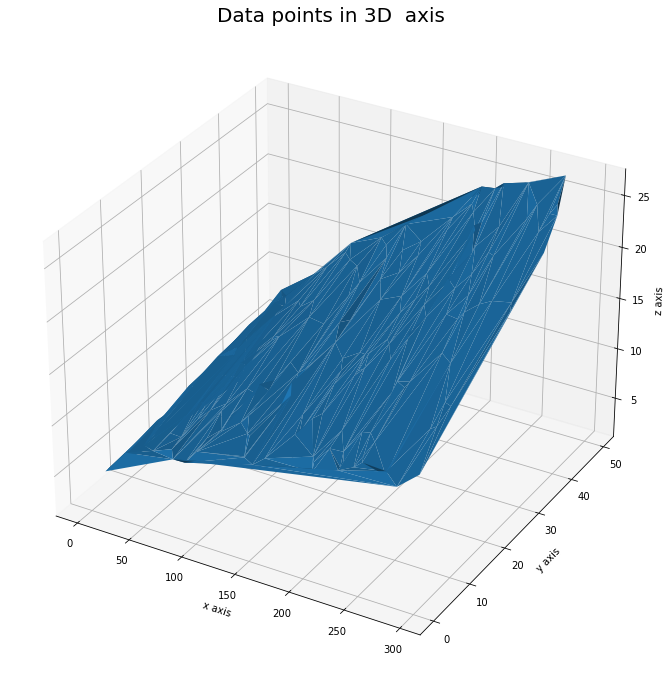

In [13]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(data['TV'], data['Radio'], data["Sales"])

plt.title('Data points in 3D  axis', fontsize=20)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()

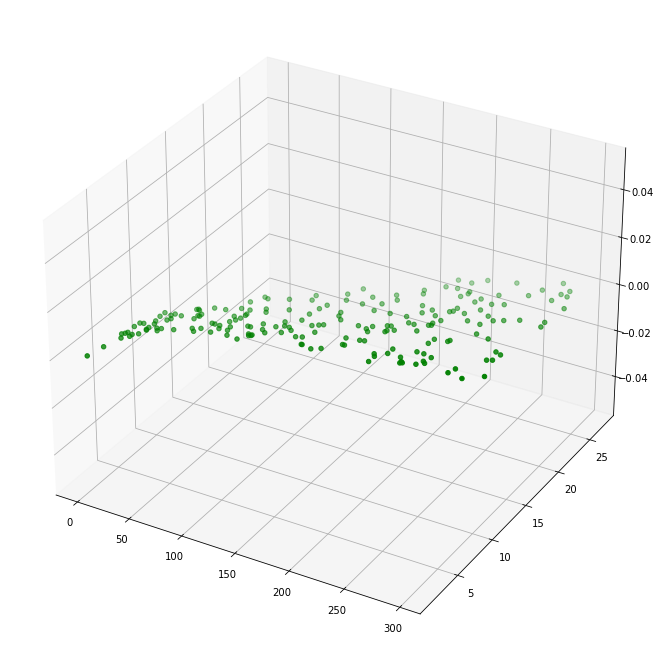

In [14]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['TV'], data['Sales'],c="g")

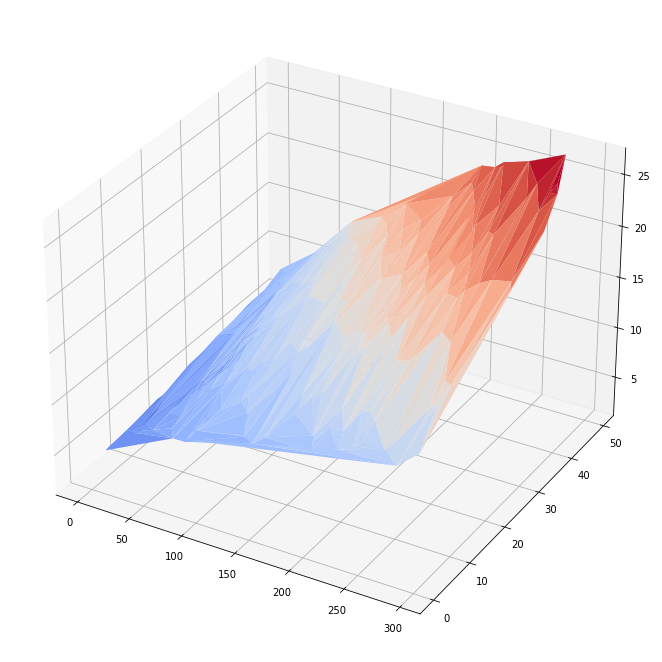

In [15]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(data['TV'], data["Radio"],data["Sales"],cmap="coolwarm")

In [16]:
sns.set(rc={'figure.figsize':(15,20)})
data.corr().style.background_gradient("magma")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


E:\Anacondafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


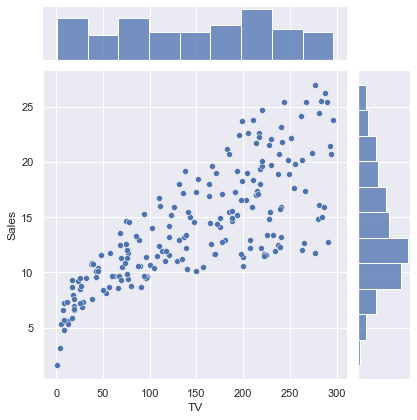

In [17]:
sns.set(rc={'figure.figsize':(12,20)})
sns.jointplot(data["TV"],data["Sales"])

In [44]:
y=data[['Sales']]
x=data.iloc[:,:-1]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [46]:
print(x_train.shape)
print(x_test.shape)

(140, 3)
(60, 3)


In [48]:
regr = LinearRegression()

X = data[['TV']]
y = data[['Sales']]

In [49]:
regr.fit(X,y)

LinearRegression()

In [50]:
Sales_pred = regr.predict(X)

In [51]:
print("The R2 score for UVLR is %f" % (metrics.r2_score(y, Sales_pred))) 

The R2 score for UVLR is 0.611875


In [52]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [53]:
regr.fit(X,y)

LinearRegression()

In [54]:
Sales_pred = regr.predict(X)

In [56]:
print("The R2 score for MVLR is %f" % (metrics.r2_score(y, Sales_pred))) 

The R2 score for MVLR is 0.897211


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
regr.fit(X_train, y_train)

LinearRegression()

In [59]:
Sales_pred = regr.predict(X_test)

In [61]:
print("The R2 score for MVLR is %f" % (metrics.r2_score(y_test, Sales_pred))) 

The R2 score for MVLR is 0.903508


# SVR

In [62]:
from sklearn.svm import SVR

In [63]:
regressor = SVR(kernel = 'linear')
regressor.fit(X,y)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [64]:
y_Pred = regressor.predict(X)

In [66]:
print("The R2 score for SVR is %f" % (metrics.r2_score(y, regressor.predict(X)))) 

The R2 score for SVR is 0.891620


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [68]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [69]:
y_Pred = regressor.predict(X_test)

In [71]:
print("The R2 score for SVR is %f" % (metrics.r2_score(y_test, regressor.predict(X_test)))) 

The R2 score for SVR is 0.932979
